In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
#nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('output_lower.csv')
data.head(10)

,rating,review
0,__label__5,jeg elsker zaladnozalando har så mange forskel...
1,__label__4,handlet flere gange. gode produkter nemt at b...
2,__label__5,alt til ug. billige priser. nem returnering. s...
3,__label__2,hej betalt min regning ( troede jeg) den var å...
4,__label__5,super godt.hurtig levering og fine priser.
5,__label__2,jeg har bestilt et par sandaler ved zalando og...
6,__label__1,irriterende at få en rykker på 100 kr for mang...
7,__label__3,har køb hos zalando i mange år og har været st...
8,__label__1,synes godt nok det er for dårligt at man betal...
9,__label__1,nu har jeg oplevet flere gange hvor jeg bestil...


In [3]:
data['processed_text'] = data['review']

In [4]:
import fasttext

model = fasttext.train_supervised('output_lower.csv')
data['vec'] = data['processed_text'].apply(lambda x: model.get_sentence_vector(x))

In [5]:
# modellen kan her finde de ord der er tættes på parametret 
model.get_nearest_neighbors('dårlig')

[(0.9989197850227356, 'ikke'),
 (0.9979293346405029, 'd.'),
 (0.9978984594345093, 'nu'),
 (0.9976190328598022, 'stadig'),
 (0.9975525736808777, ',dårlig'),
 (0.9974608421325684, 'sendt'),
 (0.9966822862625122, 'bliver'),
 (0.9962875843048096, ',elendig'),
 (0.9955758452415466, 'ordre'),
 (0.9950747489929199, 'fejl')]

In [6]:
model.get_nearest_neighbors('utilfreds')

[(0.8871868252754211, 'uden'),
 (0.886428713798523, 'ifbm.'),
 (0.8851728439331055, 'står'),
 (0.8851489424705505, ',behøver'),
 (0.8841875791549683, 'skriver'),
 (0.8837559223175049, 'fået'),
 (0.8832255005836487, 'dages'),
 (0.8825854063034058, 'andet'),
 (0.8816366195678711, ',ringe'),
 (0.8810107707977295, 'sender')]

In [7]:
model.get_nearest_neighbors('glad')

[(0.9805887341499329, 'lidt'),
 (0.9740496873855591, 'synes'),
 (0.9736790657043457, ',hurtig'),
 (0.9734260439872742, 'fint'),
 (0.9693963527679443, 'fragt'),
 (0.9643969535827637, 'udvalg'),
 (0.9444717764854431, 'pakker'),
 (0.9372230768203735, 'man'),
 (0.9345406293869019, ',fin'),
 (0.9332855343818665, 'dog')]

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(data['vec'].values.tolist())

In [9]:
print(data['cluster'])

0       4
1       3
2       4
3       0
4       3
       ..
5059    3
5060    3
5061    4
5062    1
5063    3
Name: cluster, Length: 5064, dtype: int32


In [39]:
clusterCount = np.bincount(data['cluster'])
print(clusterCount)
-np.sort(-clusterCount)

[2036  985  310  616 1117]


array([-2036, -1117,  -985,  -616,  -310])

In [29]:
data['rating'].value_counts(ascending=False)

__label__5     2694
__label__1     1664
__label__4      289
__label__2      261
__label__3      156
Name: rating, dtype: int64

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data['x'] = pca.fit_transform(data['vec'].values.tolist())[:,0]
data['y'] = pca.fit_transform(data['vec'].values.tolist())[:,1]
data['z'] = pca.fit_transform(data['vec'].values.tolist())[:,2]

In [13]:
#print(*pca.fit_transform(data['vec'].values.tolist())[:,0])

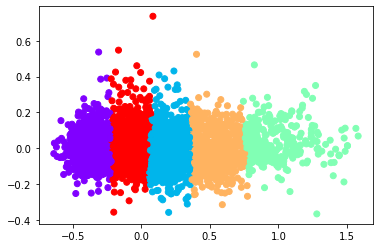

In [14]:
import matplotlib.pyplot as plt

plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='rainbow')

Text(0.5, 0.92, 'Review Clustering using K Means')

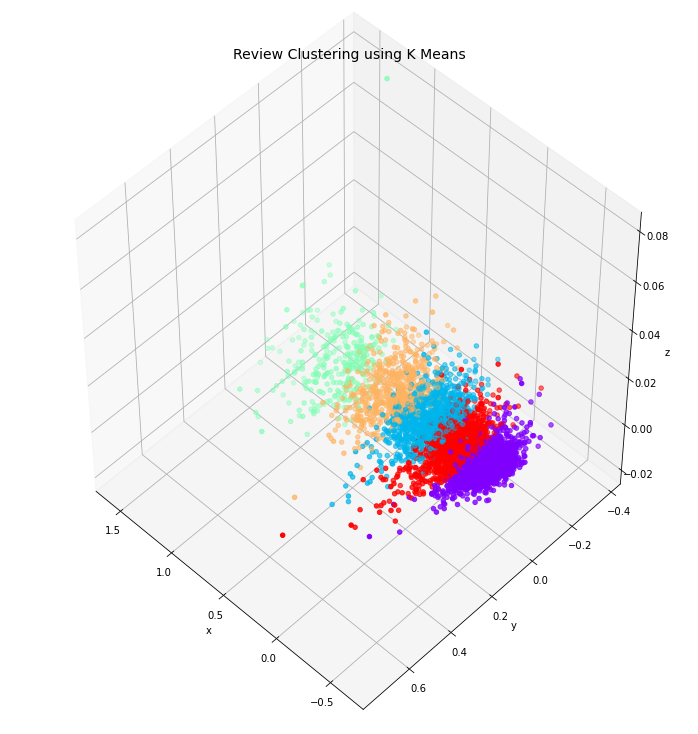

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(data['x'],data['y'],data['z'], c=data['cluster'], cmap='rainbow')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Review Clustering using K Means", fontsize=14)

